In [2]:
# Gerekli Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarılar kapatıldı
import warnings
warnings.filterwarnings("ignore")

## Logistic Regression

In [ ]:
# data import
df = pd.read_csv("../datasets/biomechanical_characteristics_of_orthopedic_patients.csv")
df.head()

In [ ]:
# Class kolonundaki sınıfların görselleştirilmesi
sns.countplot(df["class"])
plt.show()

In [ ]:
df["class"] = [1 if each == "Abnormal" else 0 for each in df["class"]]
df["class"].head()

In [ ]:
df.info()
# Makine öğrenmesi için kategorik değerlerde numeric değerlere döndürüldü

In [ ]:
y = df["class"].values # Sınıflar y değişkeninin içine atandı
x_data = df.drop(["class"],axis=1) # özellikler x_data içerisine aktarıldı 

In [ ]:
# Özellikler arasındaki ilişkilerin görselleştirilmesi
sns.pairplot(x_data)
plt.show()

### Klasik yöntemler ile yazımı (Scikit-learn kullanmadan logistic regression)

In [ ]:
# Veri normalizasyonu
# Min - max normalizasyonu
# Formül;
# data = x - min / max - min
# Min-max normalizasyonda tüm veriler 0 ile 1 arasına sıkışır
# Aykırı değerlerden etkilenebilir. 
# Aykırı değerler çok absürt olabildiği için normal datayı sıkıştırır

In [ ]:
# Normalizasyon
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

In [ ]:
# Veri setinin bölünmesi
from sklearn.model_selection import train_test_split

In [ ]:
# 15% train // 85% test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

## K- Nearest Neighbour

In [3]:
# data import
data = pd.read_csv("../datasets/biomechanical_characteristics_of_orthopedic_patients.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


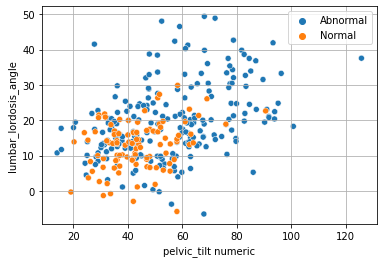

In [4]:
sns.scatterplot(data=data,x="lumbar_lordosis_angle",y="pelvic_tilt numeric",hue="class")
plt.xlabel("pelvic_tilt numeric")
plt.ylabel("lumbar_lordosis_angle")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data["class"].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [33]:
y = data["class"].values # Sınıflar y değişkeninin içine atandı
x_data = data.drop(["class"],axis=1) # özellikler x_data içerisine aktarıldı 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
# Normalizasyon
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [11]:
from sklearn.model_selection import train_test_split
# 15% train // 85% test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [12]:
# Modelin oluşturulması
from sklearn.neighbors import KNeighborsClassifier
k_number = 4
k_neighbor = KNeighborsClassifier(n_neighbors=k_number)
k_neighbor.fit(x_train,y_train)
prediction = k_neighbor.predict(x_test)

In [13]:
# Başarı hesaplama
print(f"K Neigbors Classifier'a göre başarı metriği {k_neighbor.score(x_test,y_test)}")

K Neigbors Classifier'a göre başarı metriği 0.7446808510638298


In [14]:
print(prediction)

[0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 0 1 0 0 1 1 0 1 1 0]


## En iyi K değerinin bulunması

In [26]:
score_list = []
for each in range(1,40):
    knn2 = KNeighborsClassifier(each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
print(f"{score_list.index(max(score_list)) + 1} değeri bu data için en başarılı değer -> {max(score_list)}")
print(score_list)

13 değeri bu data için en başarılı değer -> 0.8085106382978723
[0.7446808510638298, 0.723404255319149, 0.7872340425531915, 0.7446808510638298, 0.7872340425531915, 0.7872340425531915, 0.723404255319149, 0.7872340425531915, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.8085106382978723, 0.7872340425531915, 0.8085106382978723, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.7446808510638298, 0.7872340425531915, 0.7872340425531915, 0.8085106382978723, 0.7659574468085106, 0.7659574468085106, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.8085106382978723, 0.7872340425531915, 0.7659574468085106, 0.7872340425531915, 0.7659574468085106, 0.7659574468085106, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915, 0.7872340425531915]


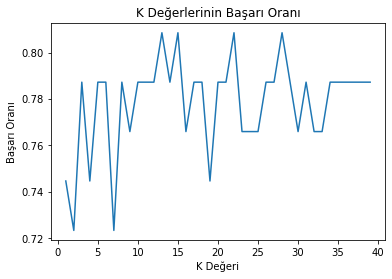

In [21]:
# Vusiualization
plt.plot(range(1,40),score_list)
plt.xlabel("K Değeri")
plt.ylabel("Başarı Oranı")
plt.title("K Değerlerinin Başarı Oranı")
plt.show()

## Suport Vector Machine 

In [40]:
# data import
data = pd.read_csv("../datasets/biomechanical_characteristics_of_orthopedic_patients.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [41]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data["class"].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [42]:
y = data["class"].values # Sınıflar y değişkeninin içine atandı
x_data = data.drop(["class"],axis=1) # özellikler x_data içerisine aktarıldı

In [43]:
# Normalizasyon
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [44]:
from sklearn.model_selection import train_test_split
# 15% train // 85% test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=33)

In [45]:
# Modelin Oluşturulması
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

print("SVC Başarı Metriği -> ", svm.score(x_test,y_test))

SVC Başarı Metriği ->  0.851063829787234


## Decision Tree Classifier

In [48]:
# data import
data = pd.read_csv("../datasets/biomechanical_characteristics_of_orthopedic_patients.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [49]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data["class"].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [50]:
y = data["class"].values # Sınıflar y değişkeninin içine atandı
x_data = data.drop(["class"],axis=1) # özellikler x_data içerisine aktarıldı

In [51]:
# Normalizasyon
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [52]:
from sklearn.model_selection import train_test_split
# 15% train // 85% test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=33)

In [55]:
# Karar ağacı alogritması eğitimi
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Decision Tree Başarı oranı -> " , dt.score(x_test,y_test))

Decision Tree Başarı oranı ->  0.8085106382978723


## Random Forest

In [58]:
# Random Forest
# Bir çok ağaç arasında algoritma çalıştırılır. Topluluk öğrenmesi örneğidir(Ensamble learning)
# Bir çok ağacın sonuçlarından çıkan en yüksek oranlı tür seçilir ve sonuç olarak verilir

In [59]:
# data import
data = pd.read_csv("../datasets/biomechanical_characteristics_of_orthopedic_patients.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [60]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data["class"].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [61]:
y = data["class"].values # Sınıflar y değişkeninin içine atandı
x_data = data.drop(["class"],axis=1) # özellikler x_data içerisine aktarıldı

In [62]:
# Normalizasyon
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [63]:
from sklearn.model_selection import train_test_split
# 15% train // 85% test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=33)

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100,random_state=1)# n_estimators -> kaç adet ağaç olucak?
rf.fit(x_train,y_train)

print("Random Forest Başarı oranı -> ", rf.score(x_test,y_test))

Random Forest Başarı oranı ->  0.9148936170212766
